# Age and Gender Prediction - CNN

## Installing Libraries

In [2]:
#installing opendatasets to donwload the UTKFace Dataset
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 15.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=e028edabd297aa228088f28b4073dee2e84d7aeabacb8865d0893fd8abf6eb6b
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/50/0a/6a/77a4f3a534f0e5fd0909a376bbdfc88238a43eb2ac35947dc7
Successfully built kaggle


In [26]:
!pip install pydot
!pip install graphviz

## Importing the Libraries

In [3]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import opendatasets as od
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
import os

warnings.filterwarnings
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

2022-10-22 15:02:10.178002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-22 15:02:10.178039: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Downloading the Dataset from Kaggle

In [7]:
if os.getcwd() == "/home/studio-lab-user/CZ4042-age-gender-pred":
    od.download('https://www.kaggle.com/datasets/jangedoo/utkface-new')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  recstu


Your Kaggle Key:

  ································


100%|██████████| 331M/331M [00:08<00:00, 39.3MB/s] 


## Loading the Dataset

In [5]:
BASE_DIR = "/home/studio-lab-user/CZ4042-age-gender-pred/utkface-new/UTKFace"

In [6]:
# Labels that the images have -= age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    info = filename.split('_')
    age = int(info[0])
    gender = int(info[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [7]:
print(f"Number of Images: {len(image_paths)}")
print(f"Number of Age Labels: {len(age_labels)}")
print(f"Number of Gender Labels: {len(gender_labels)}")

Number of Images: 23708
Number of Age Labels: 23708
Number of Gender Labels: 23708


In [8]:
#Creating a dictionary with all the information
info_dict = {'image': image_paths, 'age': age_labels, 'gender': gender_labels}

#Converting to DataFrames
df = pd.DataFrame(info_dict)
df

,image,age,gender
0,/home/studio-lab-user/CZ4042-age-gender-pred/u...,100,0
1,/home/studio-lab-user/CZ4042-age-gender-pred/u...,100,0
2,/home/studio-lab-user/CZ4042-age-gender-pred/u...,100,1
3,/home/studio-lab-user/CZ4042-age-gender-pred/u...,100,1
4,/home/studio-lab-user/CZ4042-age-gender-pred/u...,100,1
...,...,...,...
23703,/home/studio-lab-user/CZ4042-age-gender-pred/u...,9,1
23704,/home/studio-lab-user/CZ4042-age-gender-pred/u...,9,1
23705,/home/studio-lab-user/CZ4042-age-gender-pred/u...,9,1
23706,/home/studio-lab-user/CZ4042-age-gender-pred/u...,9,1


In [9]:
#map labels for gender - for display purposes
gender_dict = {0: 'Male', 1:'Female'}

## Exploratory Data Analysis

In [10]:
from PIL import Image

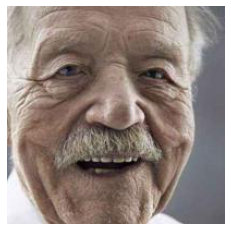

In [11]:
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img); #the ; removes the additional text

### Class Distribution

#### Age

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

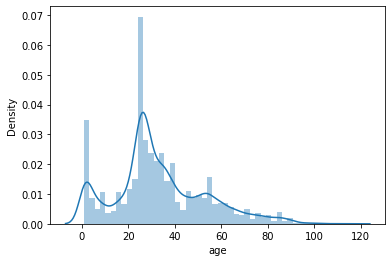

In [12]:
sb.distplot(df['age'])

#### Gender

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

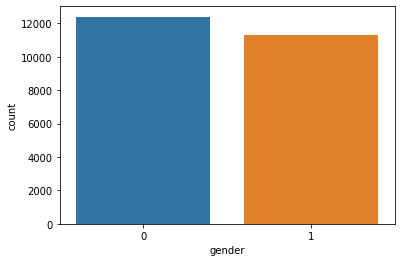

In [13]:
sb.countplot(df['gender'])

### Displaying a Grid of Images

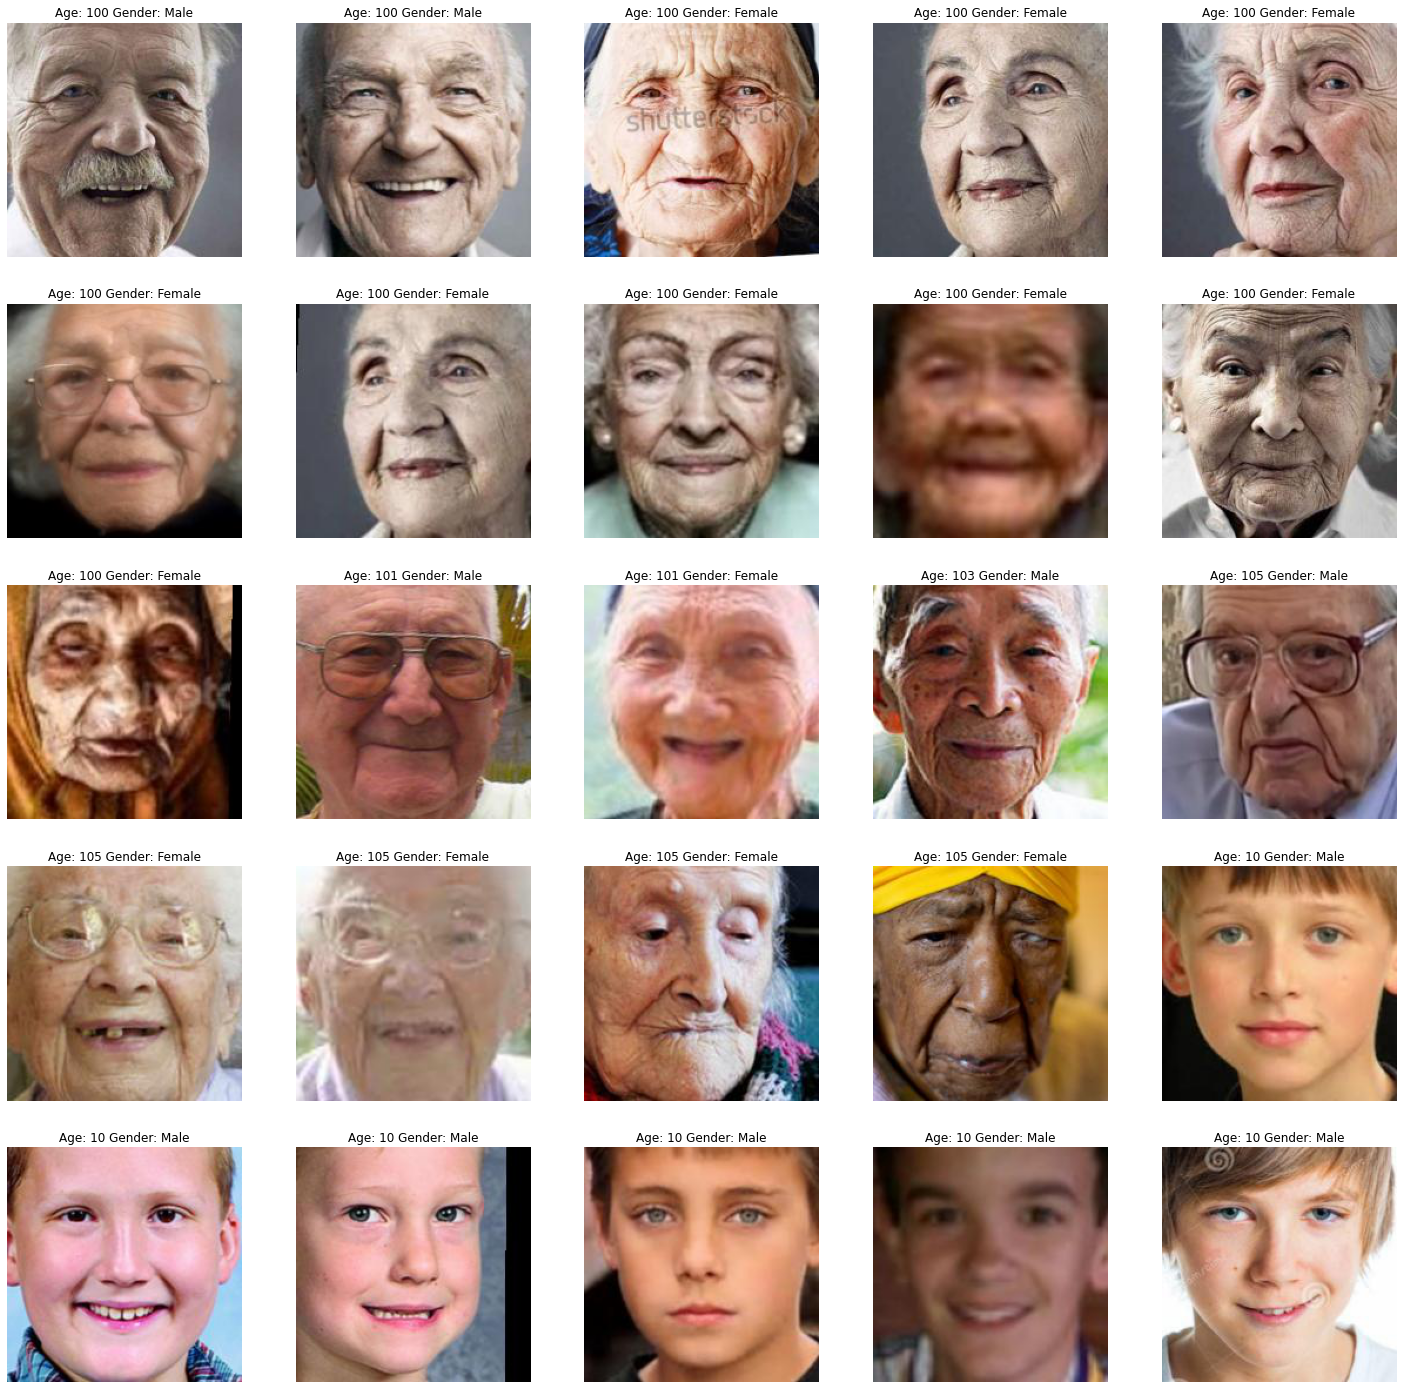

In [14]:
plt.figure(figsize=(25,25))
files = df.iloc[0:25] #getting the first 25 imgs

#iterating the 3 columns - itetuples gives the index as well
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file) #loading as array
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

## Feature Extraction

In [21]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features

In [22]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/keras/utils/image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [23]:
X.shape

(23708, 128, 128, 1)

### Normalization of Images

In [24]:
X = X/255.0 

### Converting to Numpy Array

In [25]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

## Creating the Model

Input : Image
<br>
Outputs : 2 Outputs
<br>
1. Classification output [Gender]
<br>
2. Regression output [Age]

In [26]:
input_shape = (128,128,1)

In [27]:
#Input Layer
inputs = Input((input_shape))

#Convolutional Layers
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
max_pooling1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(max_pooling1)
max_pooling2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(max_pooling2)
max_pooling3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(max_pooling3)
max_pooling4 = MaxPooling2D(pool_size=(2,2))(conv_4)

#Flattening Layer - flattens the weights matrix into a weights vector
flatten = Flatten()(max_pooling4)

#Fully Connected Layers - joining point
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

#Dropout Layers
dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

#Output Layers
output_1 = Dense(1, activation='sigmoid', name='gender_output')(dropout_1) #Classification output
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2) #Regression output 

#Combining the components
model = Model(inputs=[inputs], outputs=[output_1, output_2])

2022-10-22 15:06:58.745734: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-22 15:06:58.745769: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-22 15:06:58.745793: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-10-22 15:06:58.746626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

In [29]:
#Loss: BCE - classification; MAE - Regression
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy']) 

In [30]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Training the Model

In [32]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15


2022-10-22 15:17:17.149345: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1242955776 exceeds 10% of free system memory.


593/593 [==============================] - 446s 751ms/step - loss: 7.1975 - gender_output_loss: 0.3610 - age_output_loss: 6.8365 - gender_output_accuracy: 0.8336 - age_output_accuracy: 0.0570 - val_loss: 23.7684 - val_gender_output_loss: 0.5116 - val_age_output_loss: 23.2568 - val_gender_output_accuracy: 0.7720 - val_age_output_accuracy: 0.0000e+00
Epoch 2/15
593/593 [==============================] - 742s 1s/step - loss: 6.6815 - gender_output_loss: 0.3161 - age_output_loss: 6.3654 - gender_output_accuracy: 0.8574 - age_output_accuracy: 0.0576 - val_loss: 26.8418 - val_gender_output_loss: 0.4295 - val_age_output_loss: 26.4123 - val_gender_output_accuracy: 0.7931 - val_age_output_accuracy: 0.0000e+00
Epoch 3/15
593/593 [==============================] - 847s 1s/step - loss: 6.3780 - gender_output_loss: 0.2893 - age_output_loss: 6.0887 - gender_output_accuracy: 0.8714 - age_output_accuracy: 0.0574 - val_loss: 27.6296 - val_gender_output_loss: 0.4236 - val_age_output_loss: 27.2060 - val_

In [33]:
#saving the model
model.save("run1_epochs15_bs32")

INFO:tensorflow:Assets written to: run1_epochs15_bs32/assets


INFO:tensorflow:Assets written to: run1_epochs15_bs32/assets


In [34]:
!pwd

/home/studio-lab-user/CZ4042-age-gender-pred


## Plotting Results

### Gender

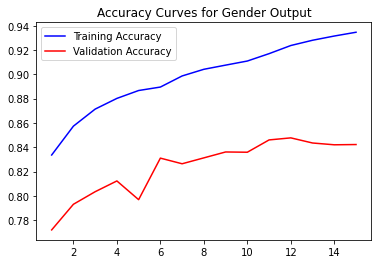

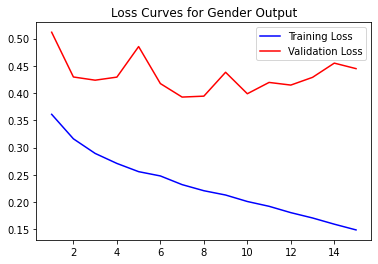

In [40]:
epochs = range(1,16)

gender_train_accuracy = history.history['gender_output_accuracy']
gender_val_accuracy = history.history['val_gender_output_accuracy']

plt.plot(epochs,gender_train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs,gender_val_accuracy, 'r', label='Validation Accuracy')
plt.title('Accuracy Curves for Gender Output')
plt.legend()
plt.figure()

gender_train_loss = history.history['gender_output_loss']
gender_val_loss = history.history['val_gender_output_loss']

plt.plot(epochs,gender_train_loss, 'b', label='Training Loss')
plt.plot(epochs,gender_val_loss, 'r', label='Validation Loss')
plt.title('Loss Curves for Gender Output')
plt.legend()
plt.show()

### Age

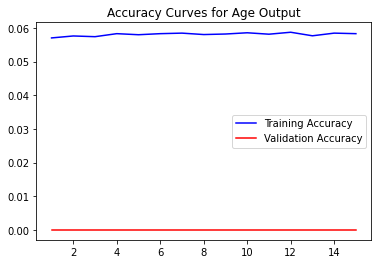

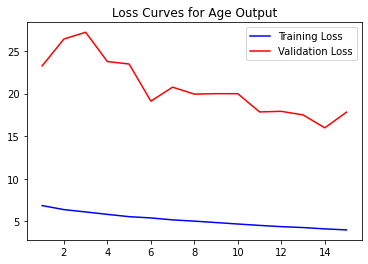

In [41]:
age_train_accuracy = history.history['age_output_accuracy']
age_val_accuracy = history.history['val_age_output_accuracy']

plt.plot(epochs, age_train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_accuracy, 'r', label='Validation Accuracy')
plt.title('Accuracy Curves for Age Output')
plt.legend()
plt.figure()

age_train_loss = history.history['age_output_loss']
age_val_loss = history.history['val_age_output_loss']

plt.plot(epochs, age_train_loss, 'b', label='Training Loss')
plt.plot(epochs, age_val_loss, 'r', label='Validation Loss')
plt.title('Loss Curves for Age Output')
plt.legend()
plt.show()

## Prediction on Test Data

1/1 [==============================] - 0s 87ms/step
Ground Truth Labels - Gender : Female, Age : 24
Predictions - Gender : Female, Age : 26


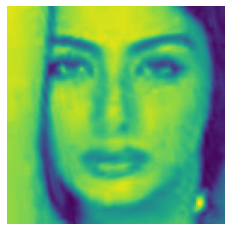

In [59]:
image_index = 4894

#Model Prediction
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(f"Ground Truth Labels - Gender : {gender_dict[y_gender[image_index]]}, Age : {y_age[image_index]}")
print(f"Predictions - Gender : {pred_gender}, Age : {pred_age}")
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128)) #can add in cmap = 'gray'

In [61]:
score = model.evaluate(X, [y_gender, y_age])

2022-10-22 18:59:40.357124: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1553727488 exceeds 10% of free system memory.


741/741 [==============================] - 206s 278ms/step - loss: 6.3520 - gender_output_loss: 0.1852 - age_output_loss: 6.1668 - gender_output_accuracy: 0.9299 - age_output_accuracy: 0.0468


In [64]:
score_dict = {}

for i in range(len(score)):
    score_dict[model.metrics_names[i]] = score[i]
    
score_dict

{'loss': 6.352017402648926,
 'gender_output_loss': 0.1851777583360672,
 'age_output_loss': 6.166839122772217,
 'gender_output_accuracy': 0.9299392700195312,
 'age_output_accuracy': 0.04677746072411537}

Overall the Classification Task seems to be doing well, but need to work on fine-tuning the Regression Task.

**Things to do to Improve the model:**
1. Fine-tune the Regression Model
2. Try Removing values that are greater than 100
3. Re-split the train-test-val into a more structural format --> use sklearn to split